In [1]:
from dask_yarn import YarnCluster
from dask.distributed import Client

/home/hadoop/miniconda/lib/python3.8/site-packages/dask_yarn/core.py:16: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import (
/home/hadoop/miniconda/lib/python3.8/site-packages/dask_yarn/core.py:16: FutureWarning: parse_timedelta is deprecated and will be removed in a future release. Please use dask.utils.parse_timedelta instead.
  from distributed.utils import (


In [2]:
cluster = YarnCluster(environment="/home/hadoop/environment.tar.gz",
                      worker_vcores = 1,
                      worker_memory = "8GiB"
                      )

# Scale cluster out to 8 such workers:
cluster.scale(5)

# Connect to the cluster (before proceeding, you should wait for workers to be registered by the dask scheduler, as below):
client = Client(cluster)

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at:  tcp://172.31.26.114:8786
distributed.scheduler - INFO -   dashboard at:                    :41757
distributed.scheduler - INFO - Receive client connection: Client-f6ee0d7e-f45d-11ed-ad4a-0a07b7bee76b
distributed.core - INFO - Starting established connection


In [3]:
import dask.dataframe as dd

df = dd.read_parquet("s3://amazon-reviews-pds/parquet/product_category=Books/*.parquet",
                     storage_options={'anon': True, 'use_ssl': False},
                     engine='fastparquet')

/home/hadoop/miniconda/lib/python3.8/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/hadoop/miniconda/lib/python3.8/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/hadoop/miniconda/lib/python3.8/site-packages/dask/dataframe/backends.py:187: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
distributed.scheduler - INFO - Register worker <WorkerState 'tcp://

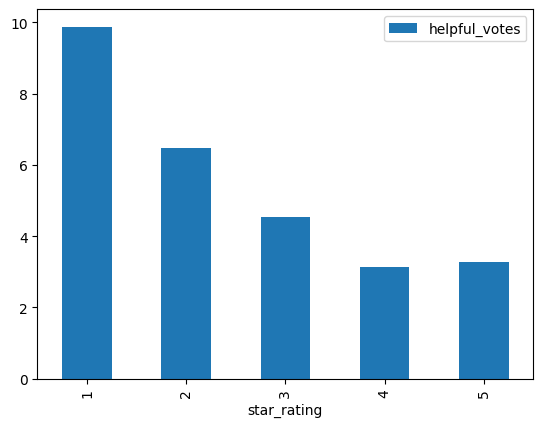

In [4]:
helpful_by_star = (df[['star_rating', 'helpful_votes']].groupby('star_rating')
                                                       .mean())
helpful_df = helpful_by_star.compute() # returns Pandas DataFrame
%matplotlib inline
import matplotlib.pyplot as plt

helpful_df.plot(kind="bar");

The depicted chart illustrates the distribution of cumulative helpful votes, categorized by star rating. This is significant as it potentially reveals the correlation between the star rating and the quantity of helpful votes. From the chart, it's evident that the majority of helpful votes correspond to 1-star ratings, outpacing all other rating categories. This could suggest that readers are more inclined to provide more helpful votes when they thoroughly unlike the book as opposed to those they find appealing or satisfactory. It is reasonable that they tend to eplain why they don't like the book and that reason tends to be helpful.

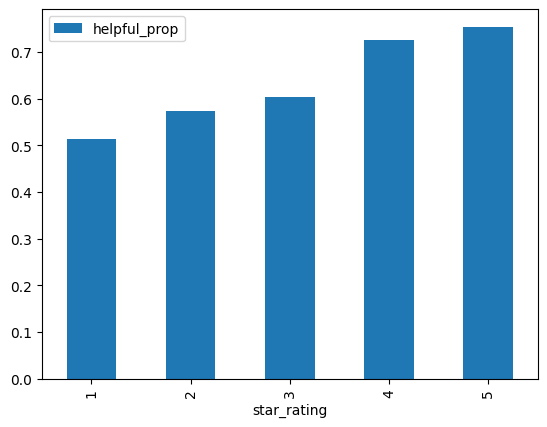

In [8]:
df["helpful_prop"] = df["helpful_votes"]/df["total_votes"]
prop_votes_by_star = (df[['star_rating', 'helpful_prop']].groupby('star_rating')
                                                       .mean())
prop_votes_df = prop_votes_by_star.compute() # returns Pandas DataFrame
%matplotlib inline

prop_votes_df.plot(kind="bar");

The chart presented visualizes the distribution of the percentage of helpful votes out of the total votes, grouped by star ratings. The chart clearly suggests that customers that assign 5-star rating tend to have a higher proportion of helpful votes. This could imply that rating 5-star for a book tends to have a higher proportion of helpful votes. Note this plot looks similar but actually different from the last one as the last one uses quantity and this plot uses proportion.

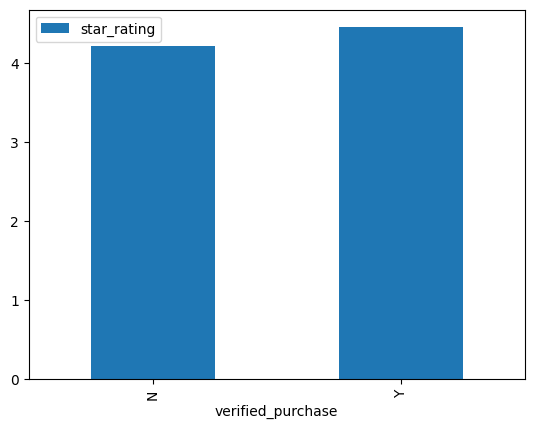

In [7]:
star_by_verify = (df[['star_rating', 'verified_purchase']].groupby('verified_purchase')
                                                       .mean())
star_by_verify_df = star_by_verify.compute() # returns Pandas DataFrame
%matplotlib inline
star_by_verify_df.plot(kind="bar");

The graph displayed above represents the distribution of helpful votes as a fraction of total votes, grouped according to star ratings. From this plot, it becomes apparent that customers contributing a higher proportion of helpful votes are more likely to give 5-star ratings. It could be interpreted that customers who regularly offer insightful reviews are more prone to assign higher ratings to books they enjoy, as compared to those they do not.

distributed.scheduler - INFO - Register worker <WorkerState 'tcp://172.31.17.8:35743', name: dask.worker_0, memory: 0, processing: 10>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.17.8:35743
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register worker <WorkerState 'tcp://172.31.28.50:33657', name: dask.worker_1, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.28.50:33657
distributed.core - INFO - Starting established connection


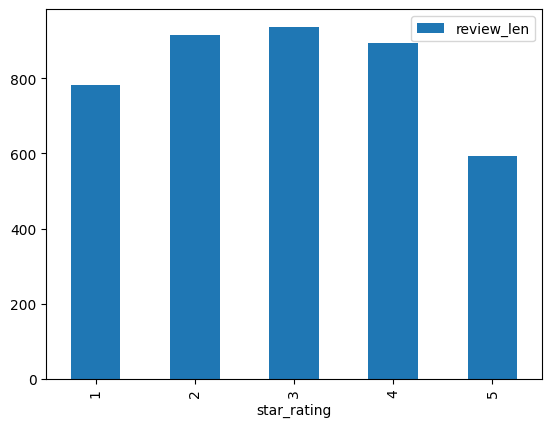

In [4]:
df['review_len'] = df["review_body"].str.len()
star_by_review_len = df[['star_rating', 'review_len']].groupby('star_rating').mean()
star_by_review_len_df = star_by_year.compute() # returns Pandas DataFrame
%matplotlib inline
star_by_review_len_df.plot(kind="bar");

The above plot shows the review length distribution based on the star rating. The plot shows that customers would have shorter reviews when they are very like or unlike the book on average. It is reasonable for good reviews to be short, and for customers who are no very like the book to wrtie more to explain.

distributed.scheduler - INFO - Remove worker <WorkerState 'tcp://172.31.28.50:45703', name: dask.worker_0, memory: 0, processing: 2>
distributed.core - INFO - Removing comms to tcp://172.31.28.50:45703
distributed.scheduler - INFO - Register worker <WorkerState 'tcp://172.31.28.50:43415', name: dask.worker_0, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.28.50:43415
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Remove worker <WorkerState 'tcp://172.31.28.50:42943', name: dask.worker_4, memory: 1, processing: 2>
distributed.core - INFO - Removing comms to tcp://172.31.28.50:42943
distributed.scheduler - INFO - Register worker <WorkerState 'tcp://172.31.28.50:37745', name: dask.worker_4, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.28.50:37745
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Rem

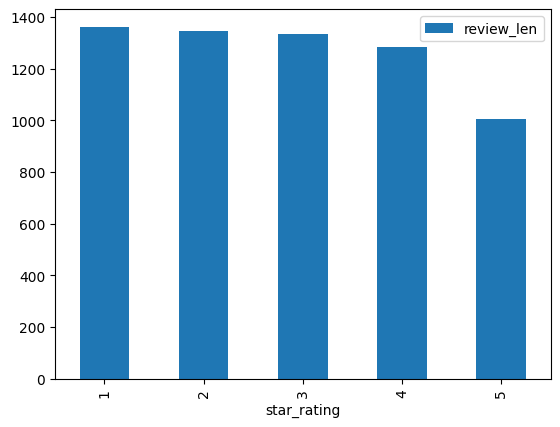

In [13]:
star_by_review_std = df[['star_rating', 'review_len']].groupby('star_rating').std()
star_by_review_std_df = star_by_review_std.compute() # returns Pandas DataFrame
%matplotlib inline
star_by_review_std_df.plot(kind="bar");

The above plot shows the review length std distribution based on the star rating. There is a jump from 5 star to other ratings, meaning that the customers review may differ a lot when they are not very like the book. This plot could be used with the last plot together.

distributed.scheduler - INFO - Remove worker <WorkerState 'tcp://172.31.17.8:33591', name: dask.worker_2, memory: 1, processing: 3>
distributed.core - INFO - Removing comms to tcp://172.31.17.8:33591
distributed.scheduler - INFO - Register worker <WorkerState 'tcp://172.31.17.8:33951', name: dask.worker_2, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.17.8:33951
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Remove worker <WorkerState 'tcp://172.31.28.50:37699', name: dask.worker_1, memory: 1, processing: 2>
distributed.core - INFO - Removing comms to tcp://172.31.28.50:37699
distributed.scheduler - INFO - Register worker <WorkerState 'tcp://172.31.28.50:36019', name: dask.worker_1, memory: 0, processing: 0>
distributed.scheduler - INFO - Starting worker compute stream, tcp://172.31.28.50:36019
distributed.core - INFO - Starting established connection


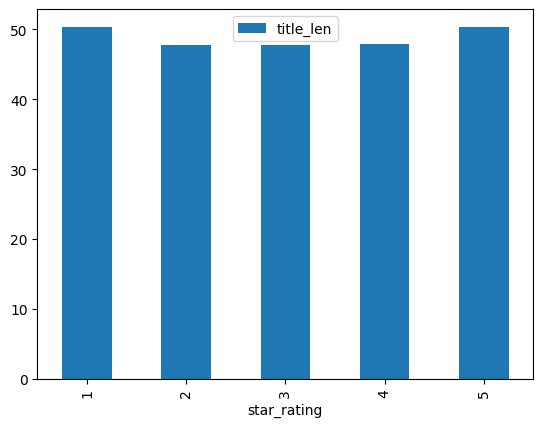

In [9]:
df["title_len"] = df["product_title"].str.len()
len_by_star = df[['star_rating', 'title_len']].groupby('star_rating').mean()
len_by_star_df = len_by_star.compute() # returns Pandas DataFrame
%matplotlib inline
len_by_star_df.plot(kind="bar");

The above plot shows the average length of the title based on the star rating. The plot shows there is no relationship between the length of the book's title and its rating, this is interesting because if there is a relationship then book readers might need to change the length of their title accordingly